# Shiladitya 2348556 ✌️

In [121]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as pt
import torchvision.transforms as trans
from torch.utils.data import DataLoader
import time

## Q1

In [122]:
print('Output shape after Conv1: [1, 16, 62, 62]')
print('Output shape after MaxPool1: [1, 16, 31, 31]')
print('Output shape after Conv2: [1, 32, 31, 31]')
print('Output shape after MaxPool2: [1, 32, 15, 1]')
print('Output shape after FC1: [1, 256]')
print('Output shape after the last layer: [1, 10]')
print('Total number of parameters (excluding bias): 1851882')

Output shape after Conv1: [1, 16, 62, 62]
Output shape after MaxPool1: [1, 16, 31, 31]
Output shape after Conv2: [1, 32, 31, 31]
Output shape after MaxPool2: [1, 32, 15, 1]
Output shape after FC1: [1, 256]
Output shape after the last layer: [1, 10]
Total number of parameters (excluding bias): 1851882


## Q2

In [123]:
transform = trans.Compose([
    trans.Resize((128, 128)),  # Resize images to 128x128
    trans.RandomHorizontalFlip(),  # Random horizontal flip for data augmentation
    trans.RandomRotation(10),  # Random rotation up to 10 degrees for data augmentation
    trans.ToTensor()  # Convert images to tensors
])
train = ImageFolder('C:/StrangerCodes/Jupyter/offline/dl_test/fruits/train', transform=transform)
test = ImageFolder('C:/StrangerCodes/Jupyter/offline/dl_test/fruits/test', transform=transform)

In [124]:
train_dl = DataLoader(train, batch_size=16, shuffle=True)
test_dl = DataLoader(test, batch_size=16, shuffle=True)

In [142]:
# Define the CNN model
class Fruits(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(128),
            # nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, stride=2),
            nn.MaxPool2d(2, 4), # output: 128 x 25 x 25

            # nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(),
            # nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(),#output :256*25*25
            # nn.MaxPool2d(5, 5), # output: 256 x 5 x 5

            nn.Flatten(),
            # nn.Linear(32768, 1024),
            # nn.BatchNorm1d(1024),
            # nn.ReLU(),
            nn.Linear(4096, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))
        
    def forward(self, x):
        return self.network(x)

In [144]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model, loss function, and optimizer
model = Fruits(num_classes=len(train.classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2)

# Train model
train_loss=[]
train_accuary=[]
test_loss=[]
test_accuary=[]

num_epochs = 31
start_time = time.time()
for epoch in range(num_epochs):
    if epoch % 5 == 0:
        print("Epoch {} running".format(epoch))
    """ Training Phase """
    model.train()
    running_loss = 0.
    running_corrects = 0
    for i, (inputs, labels) in enumerate(train_dl):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data).item()
        if i == 2:
            break
    # epoch_loss = running_loss / len(train)
    # epoch_acc = running_corrects / len(train) * 100.
    epoch_loss = running_loss / (16*3)
    epoch_acc = (running_corrects / (16*3)) * 100.
    train_loss.append(epoch_loss)
    train_accuary.append(epoch_acc)
    if epoch % 5 == 0:
        print('[Train #{}] Loss: {:.2f} Acc: {:.2f}% (time taken: {:.0f}s)'.format(epoch, epoch_loss, epoch_acc, time.time()-start_time))
    """ Testing Phase """
    model.eval()
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0
        for i, (inputs, labels) in enumerate(test_dl):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data).item()
            if i == 2:
                break
        # epoch_loss = running_loss / len(test)
        # epoch_acc = running_corrects / len(test) * 100.
        epoch_loss = running_loss / (16*3)
        epoch_acc = (running_corrects / (16*3)) * 100.
        test_loss.append(epoch_loss)
        test_accuary.append(epoch_acc)
        if epoch % 5 == 0:
            print('[Test #{}] Loss: {:.2f} Acc: {:.2f}% (time taken: {:.0f}s)'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))

Epoch 0 running
[Train #0] Loss: 543.84 Acc: 6.25% (time taken: 7s)
[Test #0] Loss: 2693981.67 Acc: 10.42% (time taken: 9s)
Epoch 5 running
[Train #5] Loss: 13.69 Acc: 10.42% (time taken: 49s)
[Test #5] Loss: 10190.91 Acc: 16.67% (time taken: 51s)
Epoch 10 running
[Train #10] Loss: 0.32 Acc: 8.33% (time taken: 90s)
[Test #10] Loss: 14.23 Acc: 14.58% (time taken: 92s)
Epoch 15 running
[Train #15] Loss: 0.33 Acc: 12.50% (time taken: 137s)
[Test #15] Loss: 51.88 Acc: 8.33% (time taken: 139s)
Epoch 20 running
[Train #20] Loss: 0.15 Acc: 18.75% (time taken: 189s)
[Test #20] Loss: 3.34 Acc: 8.33% (time taken: 192s)
Epoch 25 running
[Train #25] Loss: 0.18 Acc: 10.42% (time taken: 235s)
[Test #25] Loss: 0.17 Acc: 6.25% (time taken: 238s)
Epoch 30 running
[Train #30] Loss: 0.15 Acc: 12.50% (time taken: 283s)
[Test #30] Loss: 0.16 Acc: 6.25% (time taken: 285s)


In [127]:
vgg16 = models.vgg16_bn(weights='DEFAULT')
for param in vgg16.features.parameters():
    param.require_grad = False
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, 10)]) # Add our layer with 10 outputs
vgg16.classifier = nn.Sequential(*features) # Replace the model classifier

In [128]:
trainT = trans.Compose([
    trans.Resize((224, 224)),
    trans.RandomResizedCrop(224),
    # trans.RandomHorizontalFlip(), # data augmentation
    trans.ToTensor(),
    trans.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])
testT = trans.Compose([
    trans.Resize((224, 224)),
     trans.CenterCrop((224, 224)),
    trans.ToTensor(),
    trans.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('C:/StrangerCodes/Jupyter/offline/dl_test/fruits/train', trainT)
test_dataset = ImageFolder('C:/StrangerCodes/Jupyter/offline/dl_test/fruits/test', testT)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=0)

In [129]:
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

# Train vgg16
train_loss_vgg=[]
train_accuary_vgg=[]
test_loss_vgg=[]
test_accuary_vgg=[]

num_epochs = 3   #(set no of epochs)
start_time = time.time() #(for showing time)
# Start loop
for epoch in range(num_epochs): #(loop for every epoch)
    print("Epoch {} running".format(epoch+1)) #(printing message)
    """ Training Phase """
    vgg16.train()    #(training vgg16)
    running_loss = 0.   #(set loss 0)
    running_corrects = 0 
    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device) 
        # forward inputs and get output
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # get loss value and update the network weights
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data).item()
        if i == 1:
            break
    # epoch_loss = running_loss / len(train_dataset)
    epoch_loss = running_loss / 16
    # epoch_acc = running_corrects / len(train_dataset) * 100.
    epoch_acc = (running_corrects / 16) * 100.
    # Append result
    train_loss_vgg.append(epoch_loss)
    train_accuary_vgg.append(epoch_acc)
    # Print progress
    print('[Train #{}] Loss: {:.2f} Acc: {:.2f}% (time taken: {:.0f}s)'.format(epoch+1, epoch_loss, epoch_acc, time.time() -start_time))
    """ Testing Phase """
    vgg16.eval()
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0
        for i, (inputs, labels) in enumerate(test_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = vgg16(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data).item()
            if i == 1:
                break
        # epoch_loss = running_loss / len(test_dataset)
        # epoch_acc = running_corrects / len(test_dataset) * 100.
        epoch_loss = running_loss / 16
        epoch_acc = (running_corrects / 16) * 100.
        # Append result
        test_loss_vgg.append(epoch_loss)
        test_accuary_vgg.append(epoch_acc)
        # Print progress
        print('[Test #{}] Loss: {:.2f} Acc: {:.2f}% (time taken: {:.0f}s)'.format(epoch+1, epoch_loss, epoch_acc, time.time()- start_time))

Epoch 1 running
[Train #1] Loss: 0.30 Acc: 43.75% (time taken: 49s)
[Test #1] Loss: 1.02 Acc: 18.75% (time taken: 60s)
Epoch 2 running
[Train #2] Loss: 0.33 Acc: 43.75% (time taken: 102s)
[Test #2] Loss: 0.51 Acc: 37.50% (time taken: 113s)
Epoch 3 running
[Train #3] Loss: 0.25 Acc: 62.50% (time taken: 149s)
[Test #3] Loss: 7.20 Acc: 37.50% (time taken: 161s)


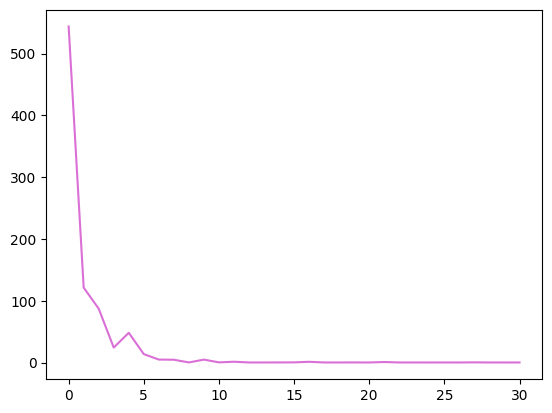

In [149]:
pt.plot(train_loss, color='orchid')

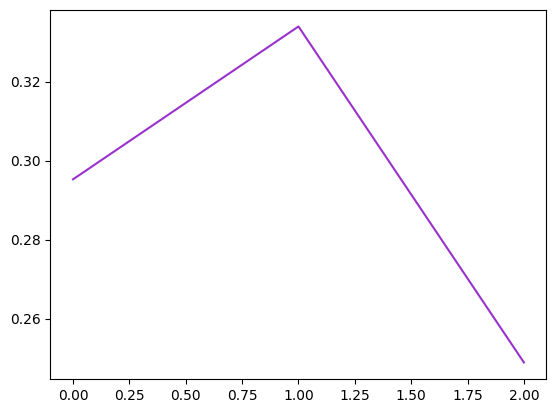

In [150]:
pt.plot(train_loss_vgg, color='darkorchid');